In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [105]:
#LEVEL-1
num = pd.read_csv(r"C:\Users\Manikanta Sai\Downloads\Dataset.csv")
print(num)

    school sex address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F       U     GT3       A     4   4.0   at_home   teacher   
1       GP   F       U     GT3       T     1   1.0   at_home     other   
2       GP   F       U     LE3       T     1   1.0   at_home     other   
3       GP   F       U     GT3       T     4   2.0    health  services   
4       GP   F       U     GT3       T     3   3.0     other     other   
..     ...  ..     ...     ...     ...   ...   ...       ...       ...   
644     MS   F       R     GT3       T     2   3.0  services     other   
645     MS   F       U     LE3       T     3   1.0   teacher  services   
646     MS   F       U     GT3       T     1   1.0     other     other   
647     MS   M       U     LE3       T     3   1.0  services  services   
648     MS   M       R     LE3       T     3   2.0  services     other   

     reason  ... Dalc  health  absences  G1    G2  G3 Feature_1 Feature_2  \
0    course  ...    1       3     

In [106]:
features=num.iloc[:,29:32]
features.info() #fetaures info and description
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  611 non-null    float64
 1   Feature_2  603 non-null    float64
 2   Feature_3  610 non-null    float64
dtypes: float64(3)
memory usage: 15.3 KB


,Feature_1,Feature_2,Feature_3
count,611.000000,603.000000,610.000000
mean,16.747954,1.913765,2.262295
std,1.216812,0.830798,1.285279
min,15.000000,1.000000,1.000000
25%,16.000000,1.000000,1.000000
50%,17.000000,2.000000,2.000000
75%,18.000000,2.000000,3.000000
max,22.000000,4.000000,5.000000


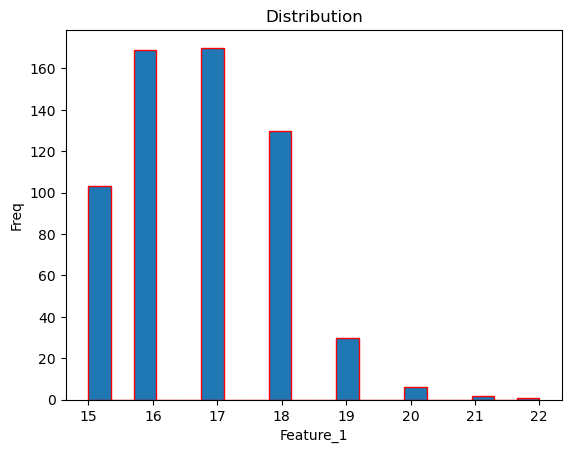

In [107]:
#histogram for Feature_1
plt.hist(features['Feature_1'],bins=20,edgecolor='red')
plt.xlabel('Feature_1')
plt.ylabel('Freq')
plt.title('Distribution')
plt.show()

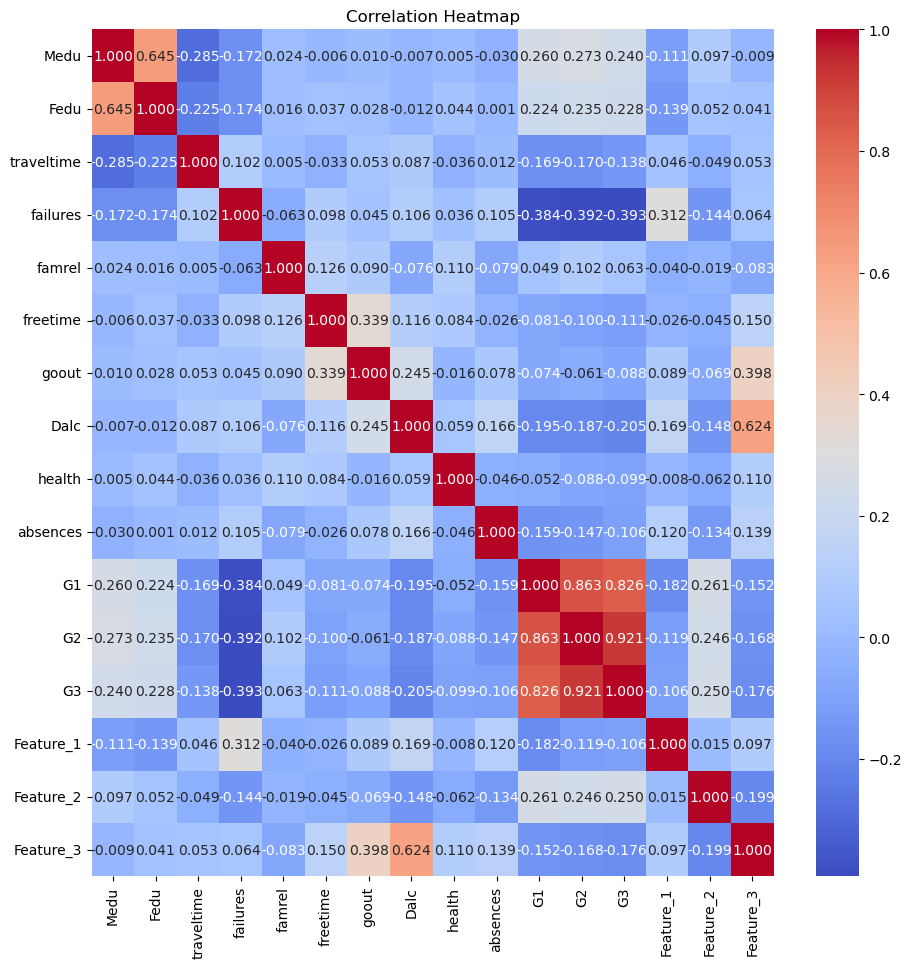

In [108]:
#Correlation Heatmap for Feature_1 and Feature_2 and Feature_3
plt.figure(figsize=(11,11))
sns.heatmap(num.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm',fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

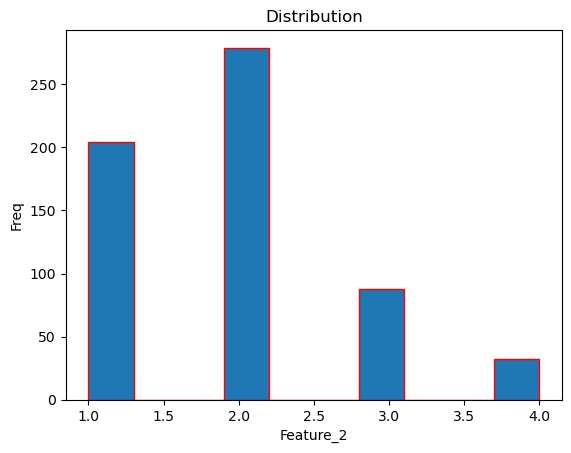

In [109]:
#histogram for Feature_2
plt.hist(features['Feature_2'],bins=10,edgecolor='red')
plt.xlabel('Feature_2')
plt.ylabel('Freq')
plt.title('Distribution')
plt.show()


<Figure size 1000x1000 with 0 Axes>

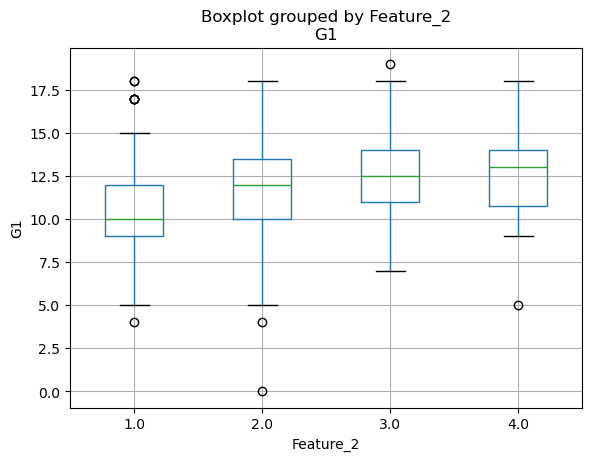

In [110]:
#correlation heatmap is already placed  above


#scatter plots for Feature_2 vs G1 (similar for G2 and G3)
plt.figure(figsize=(10,10))
num.boxplot(column='G1',by='Feature_2')
plt.xlabel('Feature_2')
plt.ylabel('G1')
plt.show()

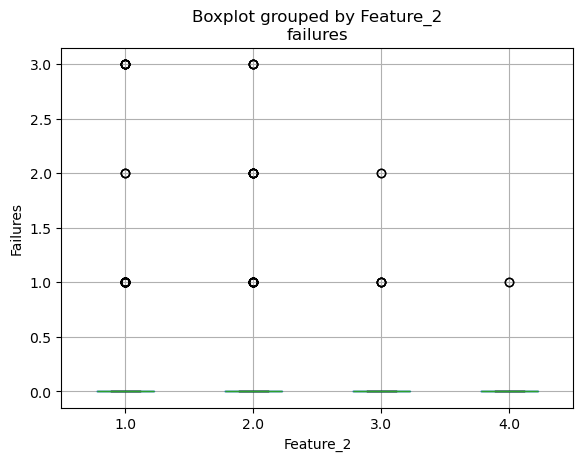

In [111]:
#boxplot between Failures and Feature_2
num.boxplot(column='failures',by='Feature_2')
plt.xlabel('Feature_2')
plt.ylabel('Failures')
plt.show()


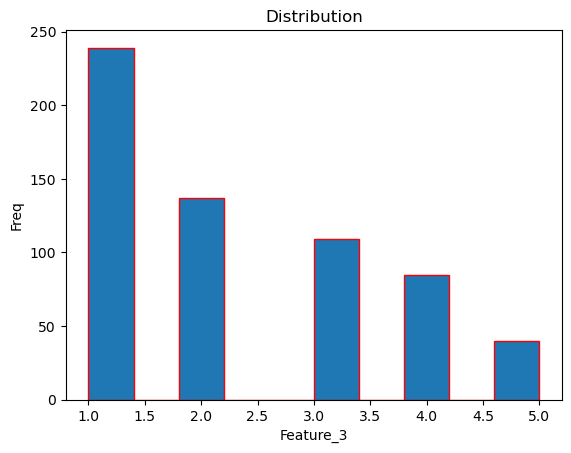

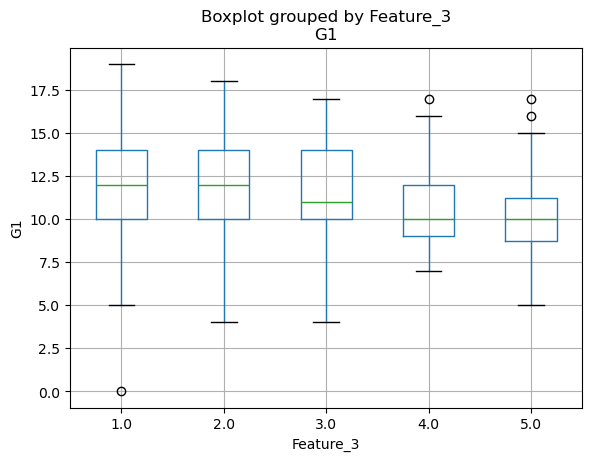

In [112]:
#Feature_3
plt.hist(features['Feature_3'],bins=10,edgecolor='red')#histogram for feature_3
plt.xlabel('Feature_3')
plt.ylabel('Freq')
plt.title('Distribution')
plt.show()
num.boxplot(column='G1',by='Feature_3') #boxplot between G1 and Feature_3
plt.xlabel('Feature_3')
plt.ylabel('G1')
plt.show()

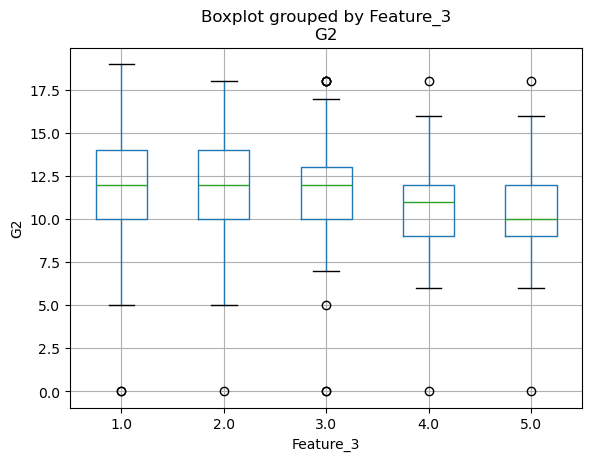

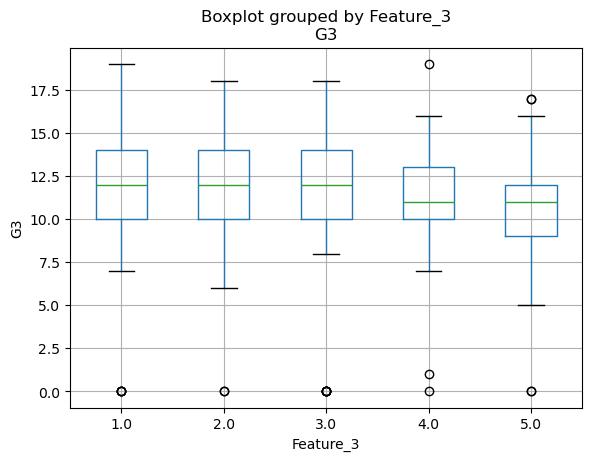

In [113]:
#similar for G2 and G3 vs Feature_3
num.boxplot(column='G2',by='Feature_3')
plt.xlabel('Feature_3')
plt.ylabel('G2')
plt.show()
num.boxplot(column='G3',by='Feature_3')
plt.xlabel('Feature_3')
plt.ylabel('G3')
plt.show()

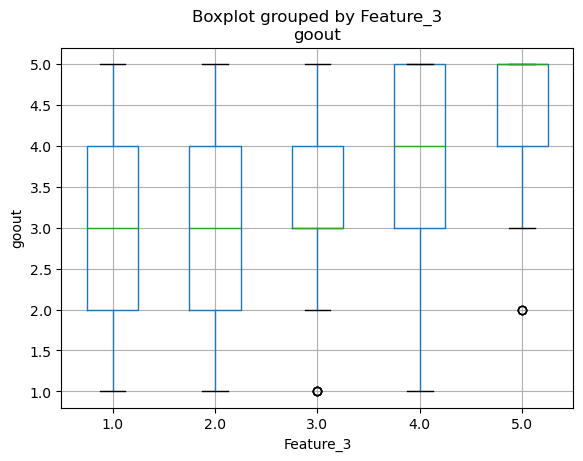

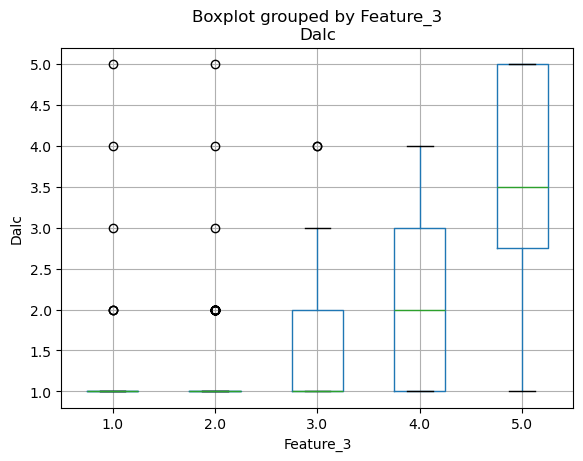

In [114]:
#box plot for feature 3 vs Dalc and goout
num.boxplot(column='goout',by='Feature_3')
plt.xlabel('Feature_3')
plt.ylabel('goout')
plt.show()
num.boxplot(column='Dalc',by='Feature_3')
plt.xlabel('Feature_3')
plt.ylabel('Dalc')
plt.show()

In [115]:
#LEVEL2
num.isnull().sum() #no of nulls in each feature 

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [116]:
#only features having non zero null enteries (numerical data)
null=num.isnull().sum()
null[null>0]

famsize       50
Fedu          73
traveltime    73
higher        76
freetime      45
absences      69
G2            35
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64

In [117]:
#selecting  object types
objects = num.select_dtypes(include='object').columns
for col in objects:
    num[col] = num[col].fillna(num[col].mode()[0]) #filling NaN using mode of object_data
num.isnull().sum() #checking whether categorial data was filled or not 

school         0
sex            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

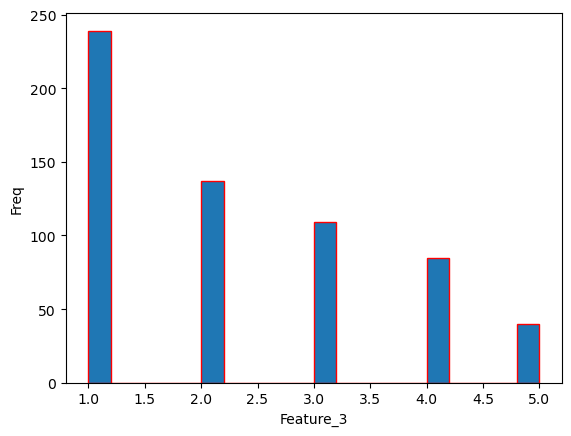

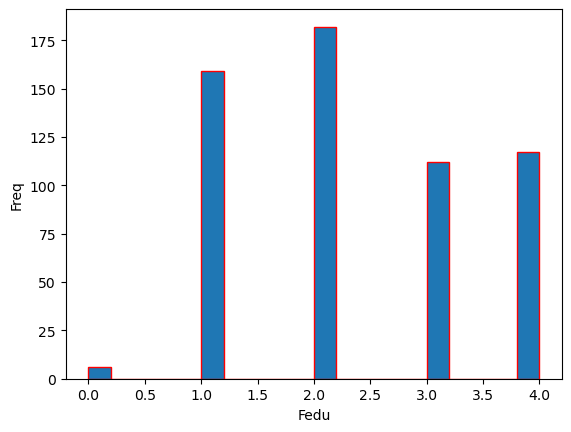

In [118]:
# Histogram b/w feature_3 and freq
plt.hist(num['Feature_3'],bins=20,edgecolor='red')
plt.xlabel('Feature_3')
plt.ylabel('Freq')
plt.show()
#Histogram b/w Fedu and freq
plt.hist(num['Fedu'],bins=20,edgecolor='red')
plt.xlabel('Fedu')
plt.ylabel('Freq')
plt.show()

In [119]:
#filling NaN for Feature_3 and Feature_2 using mode of the data column
num['Feature_3']=num['Feature_3'].fillna(num['Feature_3'].mode()[0])
num['Feature_2']=num['Feature_2'].fillna(num['Feature_2'].mode()[0])
 



In [120]:
print(num['G2'].mean())# mean of 'G2' data is not integer
print(num['traveltime'].mean())
print(num['freetime'].mean())
print(num['Feature_1'].mean())






11.586319218241043
1.5746527777777777
3.172185430463576
16.74795417348609


In [121]:
#filling NaN for G2,traveltime,freetime,Feature_1 using median of the data coloumn 
num['G2']=num['G2'].fillna(num['G2'].median())
num['traveltime']=num['traveltime'].fillna(num['traveltime'].median())
num['freetime']=num['freetime'].fillna(num['freetime'].median())
num['Feature_1']=num['Feature_1'].fillna(num['Feature_1'].median())
num['absences']=num['absences'].fillna(num['absences'].median())

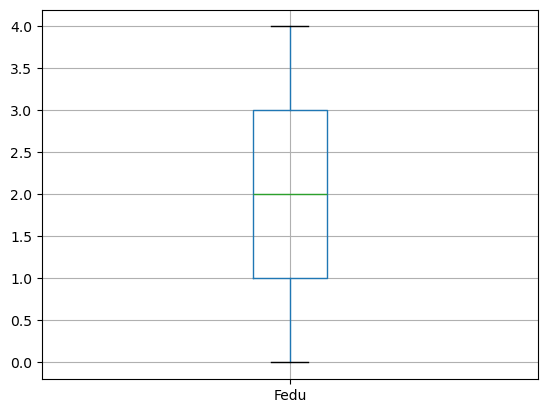

In [122]:
# boxplot for Fedu
num.boxplot(column='Fedu')
plt.show()

In [123]:
#filling NaN values for using mean of the data column
num['Fedu']=num['Fedu'].fillna(num['Fedu'].median())

In [124]:
#LEVEL_3
#Q1=>Does the students have more free time tends to goout?
#Q2=>Does Feature_2(study time) affects final grades?
#Q3=>Does alochol(Dalc) affecting the grades ?
#Q4=>Does the student loaction infulencing the final grades?
#Q5=>Does relation ship status affects the final grades?

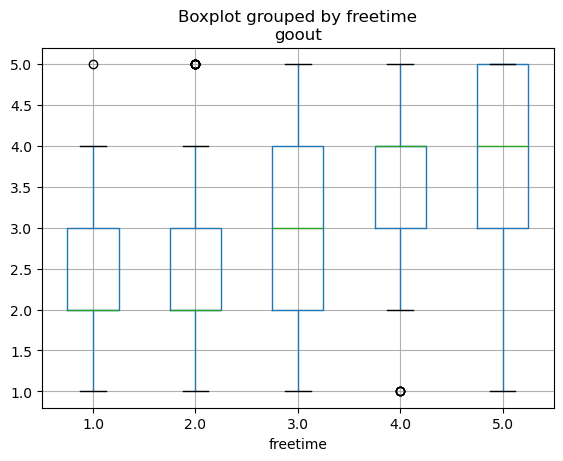

In [125]:
#Question_1
num.boxplot(column='goout',by='freetime')
plt.show()

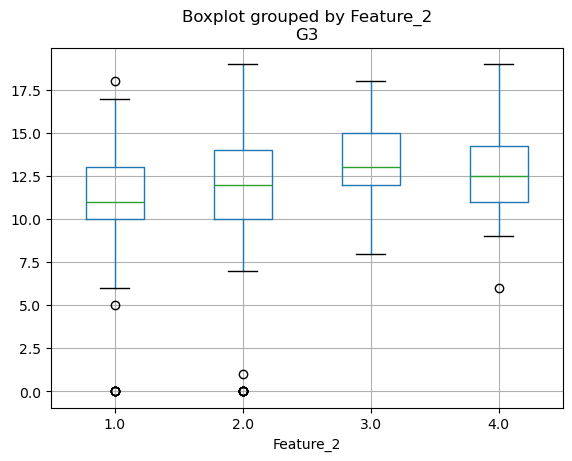

In [126]:
#Question_2
num.boxplot(column='G3',by='Feature_2')
plt.show()

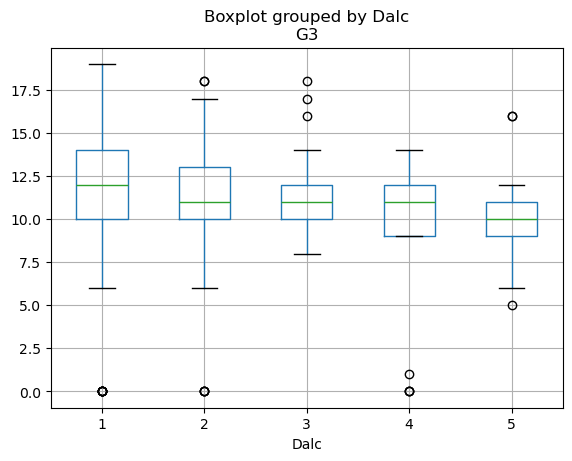

In [127]:
#Question_3
num.boxplot(column='G3',by='Dalc')
plt.show()

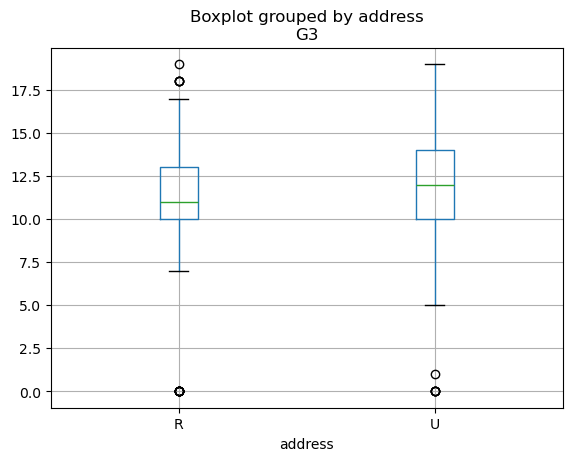

In [128]:
#Question_4
num.boxplot(column='G3',by='address')
plt.show()

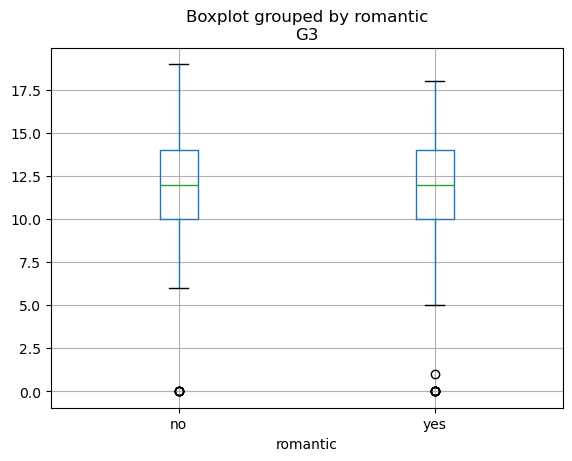

In [129]:
#Question_5
num.boxplot(column='G3',by='romantic')
plt.show()

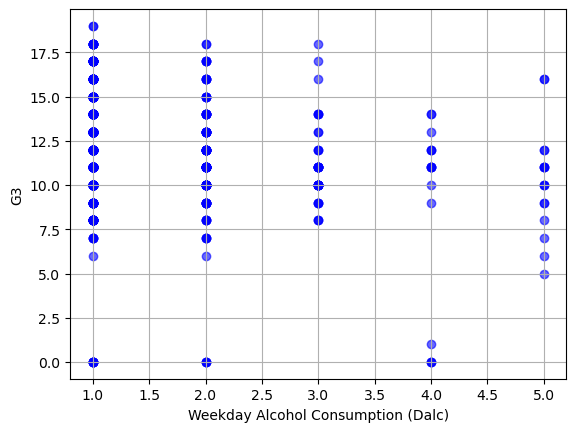

In [130]:

#scatter_plot for Dalc vs Final grade
plt.scatter(num['Dalc'], num['G3'], alpha=0.6, color='blue')
plt.xlabel('Weekday Alcohol Consumption (Dalc)')
plt.ylabel('G3')
plt.grid(True)
plt.show()


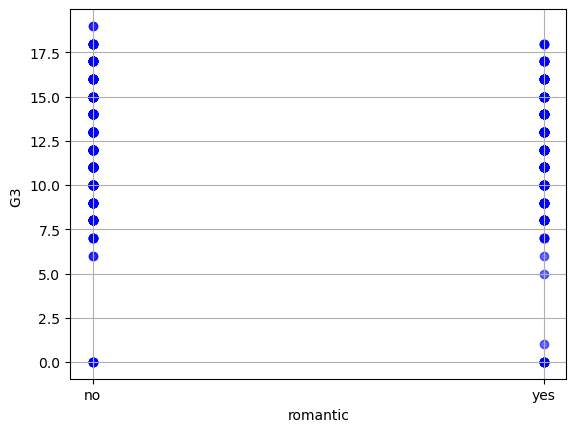

In [131]:
#scatter_plot for romantic vs Final grade
plt.scatter(num['romantic'], num['G3'], alpha=0.6, color='blue')
plt.xlabel('romantic')
plt.ylabel('G3 ')
plt.grid(True)
plt.show()